# US Visa Dataset - Exploratory Data Analysis (EDA)

This notebook performs a complete EDA on the US Visa dataset.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:

# Load dataset
df = pd.read_csv("Visadataset.csv")
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:

# Dataset overview
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  str    
 1   continent              25480 non-null  str    
 2   education_of_employee  25480 non-null  str    
 3   has_job_experience     25480 non-null  str    
 4   requires_job_training  25480 non-null  str    
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  str    
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  str    
 10  full_time_position     25480 non-null  str    
 11  case_status            25480 non-null  str    
dtypes: float64(1), int64(2), str(9)
memory usage: 2.3 MB


In [5]:

# Statistical summary
df.describe()


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:

# Check missing values
df.isnull().sum()


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:

# Separate numerical and categorical features
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_features, categorical_features


C:\Users\DELL\AppData\Local\Temp\ipykernel_2908\1611307308.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()


(['no_of_employees', 'yr_of_estab', 'prevailing_wage'],
 ['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'])

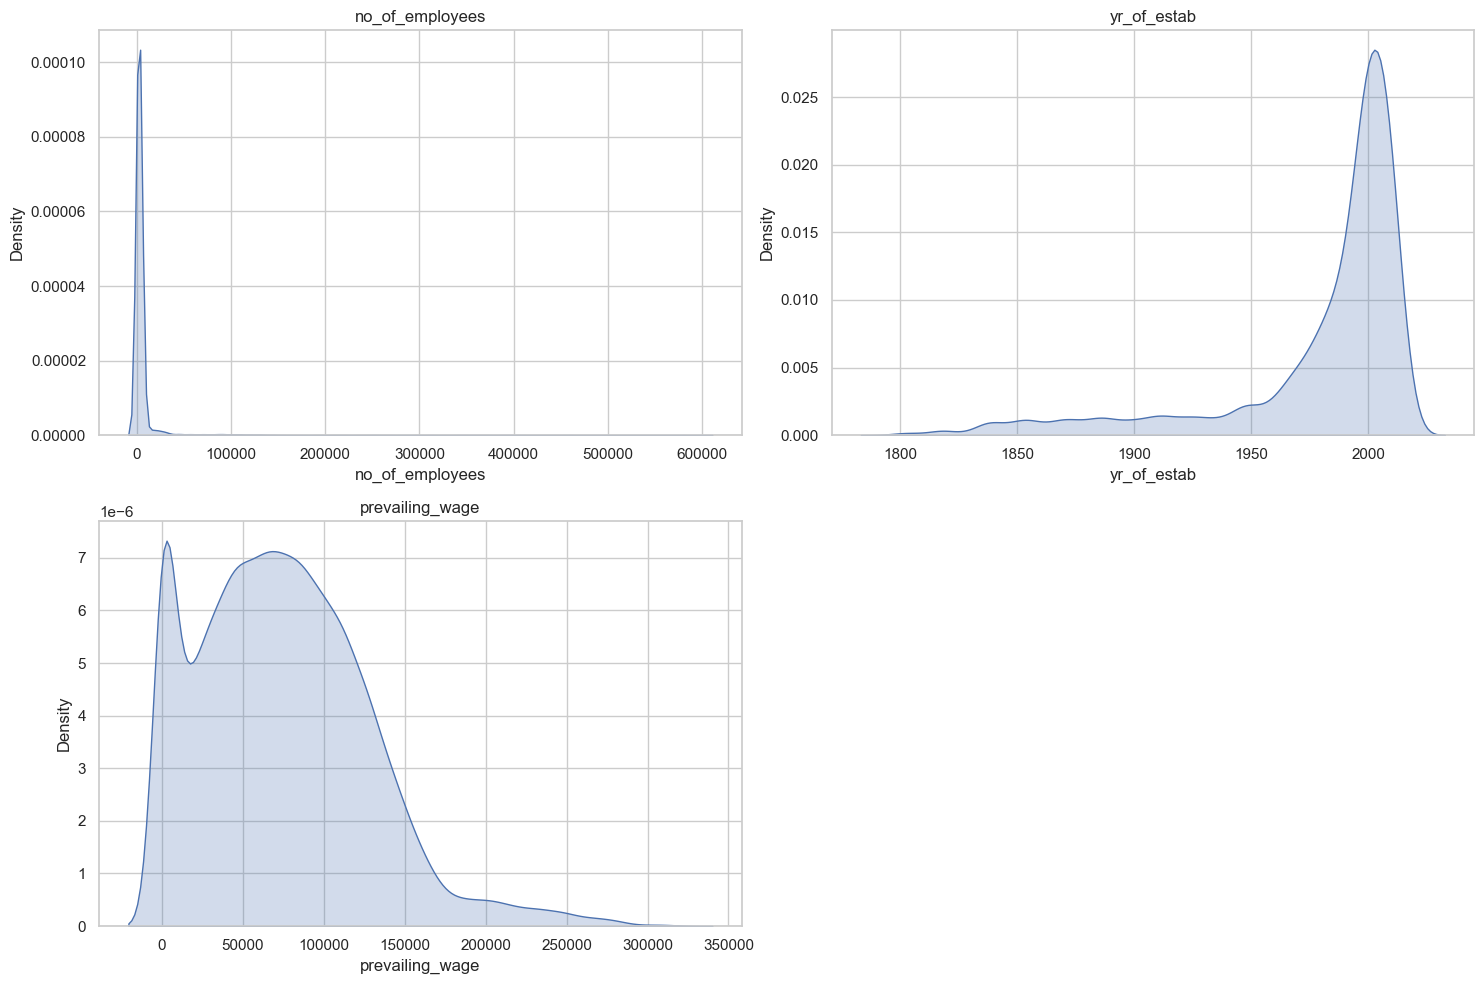

In [8]:

# Univariate analysis - Numerical features
import math

n_cols = 2
n_rows = math.ceil(len(numeric_features) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()


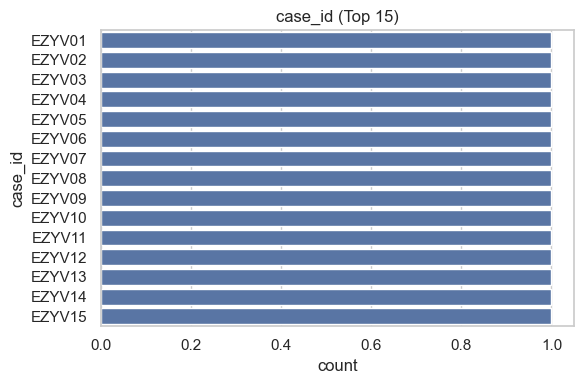

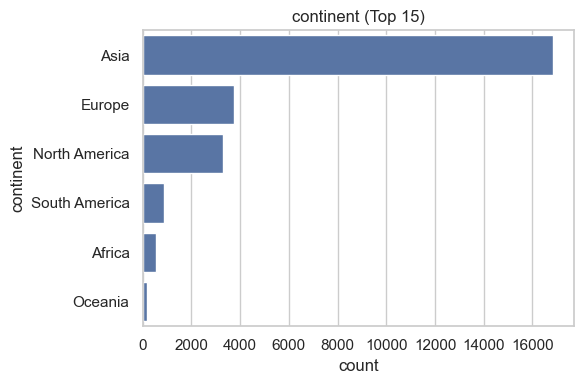

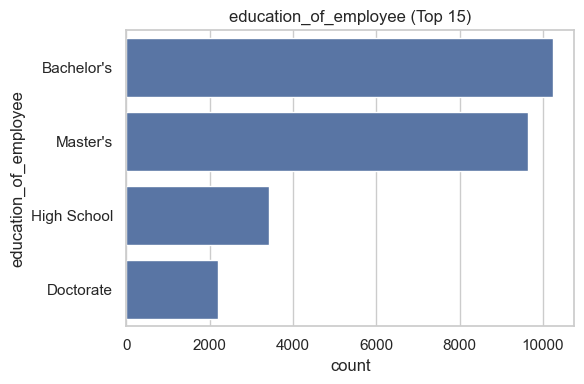

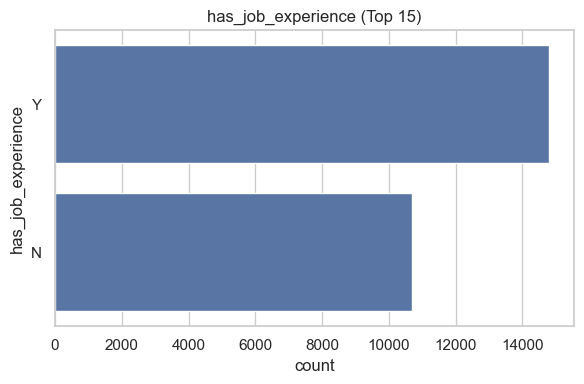

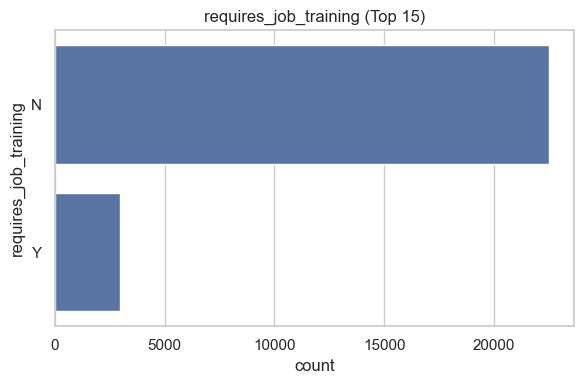

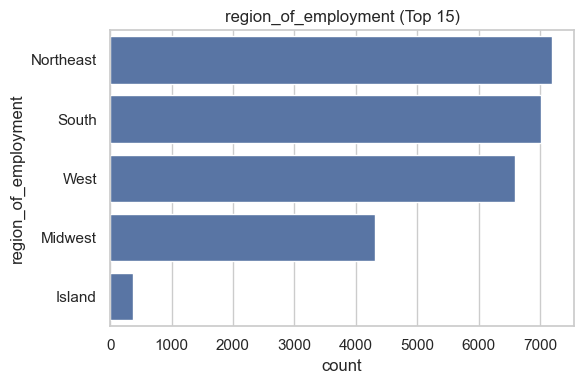

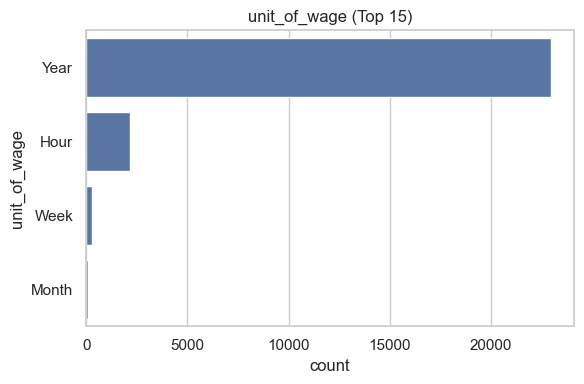

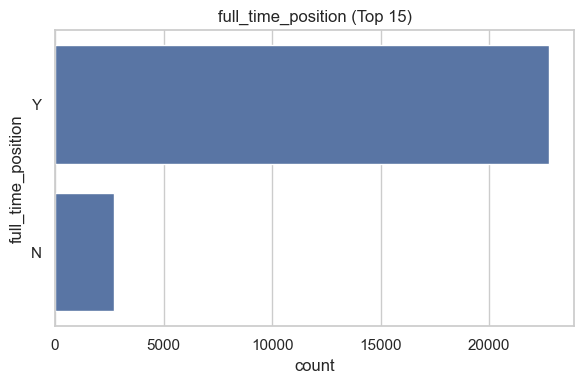

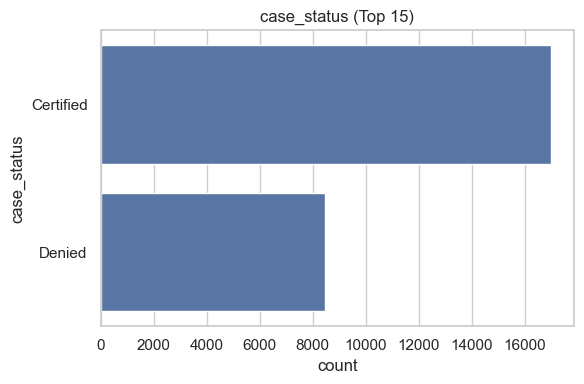

In [10]:

# Univariate analysis - Categorical features
MAX_CATEGORIES = 15

for col in categorical_features:
    top_categories = df[col].value_counts().nlargest(MAX_CATEGORIES).index

    plt.figure(figsize=(6, 4))
    sns.countplot(
        y=df[col],
        order=top_categories
    )
    plt.title(f"{col} (Top {MAX_CATEGORIES})")
    plt.tight_layout()
    plt.show()



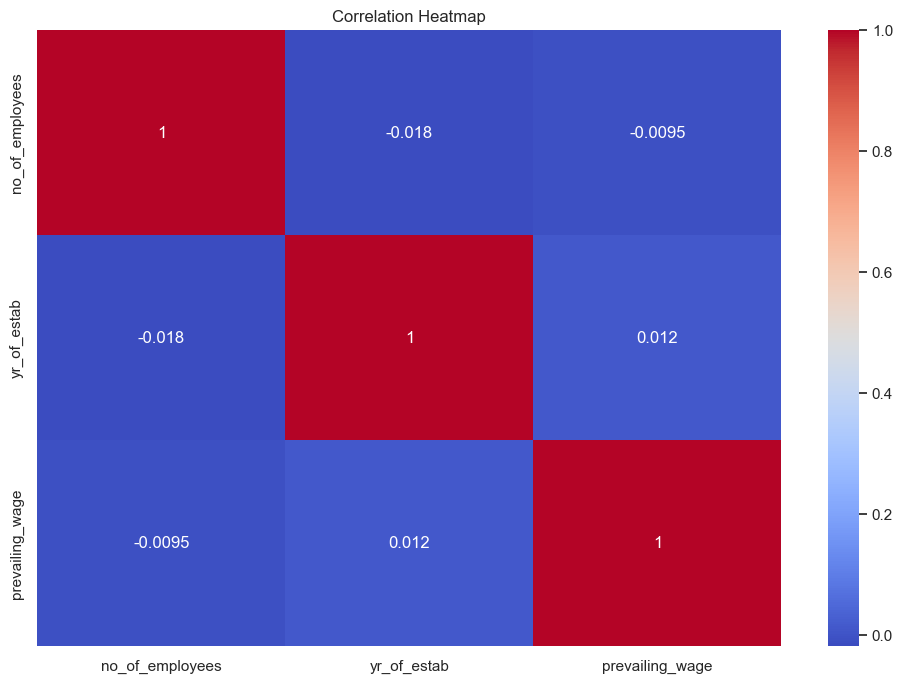

In [11]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
